In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
from pmdarima import auto_arima

In [6]:
df = pd.read_csv('./datasets/co2_mm_mlo.csv')
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [7]:
df['date'] = pd.to_datetime({'year':df['year'], 'month':df['month'], 'day':1})
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [9]:
df.set_index('date', inplace=True)

In [10]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [11]:
df.index.freq = 'MS'

<AxesSubplot:xlabel='date'>

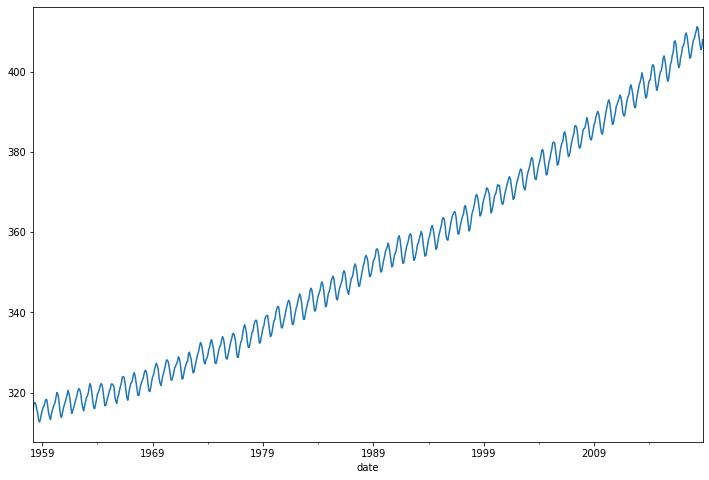

In [13]:
df['interpolated'].plot(figsize=(12, 8))

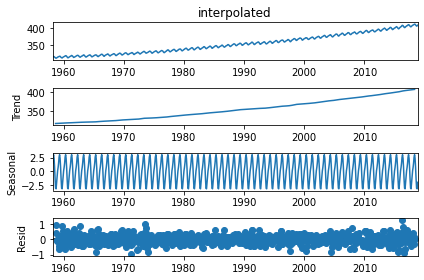

In [15]:
result = seasonal_decompose(df['interpolated'], model='add')
result.plot();

In [17]:
auto_arima(df['interpolated'], seasonal=True, m=12).summary()

D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\base\model.py:567: ConvergenceW

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -205.686
Date:                              Tue, 09 Feb 2021   AIC                            423.371
Time:                                      13:46:42   BIC                            450.913
Sample:                                           0   HQIC                           433.998
                                              - 729                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3564      0.036     -9.782      0.000      -0.428      -0.285
ma.L2         -0.0221      0.037     -0.604      0.546      -0.094       0.050
ma.L3         -0.0857      0.036     -2.397      0.017      -0.156      -0.016
ar.S.L12       0.9996      0.000   3046.843      0.000       0.999       1.000
ma.S.L12      -0.8670      0.021    -40.790      0.000      -0.909      -0.825
sigma2         0.0955      0.005     20.375      0.000       0.086       0.105
===================================================================================
Ljung-Box (Q):                       43.69   Jarque-Bera (JB):                 4.07
Prob(Q):                              0.32   Prob(JB):                         0.13
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
len(df)

729

In [19]:
train = df.iloc[:717]
test = df.iloc[717:]

In [21]:
model = SARIMAX(train['interpolated'], order=(0, 1, 1), seasonal_order=(1, 0, 1, 12))

In [22]:
results = model.fit()

In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.148
Date:                            Tue, 09 Feb 2021   AIC                            418.297
Time:                                    13:57:45   BIC                            436.591
Sample:                                03-01-1958   HQIC                           425.361
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3709      0.034    -10.801      0.000      -0.438      -0.304
ar.S.L12       0.9997      0.000   3203.444      0.000       0.999       1.000
ma.S.L12      -0.8649      0.023    -37.760      0.000      -0.910      -0.820
sigma2         0.0960      0.005     20.196      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       51.96   Jarque-Bera (JB):                 3.79
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
start = len(train)
end = len(train) + len(test) - 1

In [25]:
predictions = results.predict(start, end, typ='levels').rename('SARIMA Predicitons')

<AxesSubplot:xlabel='date'>

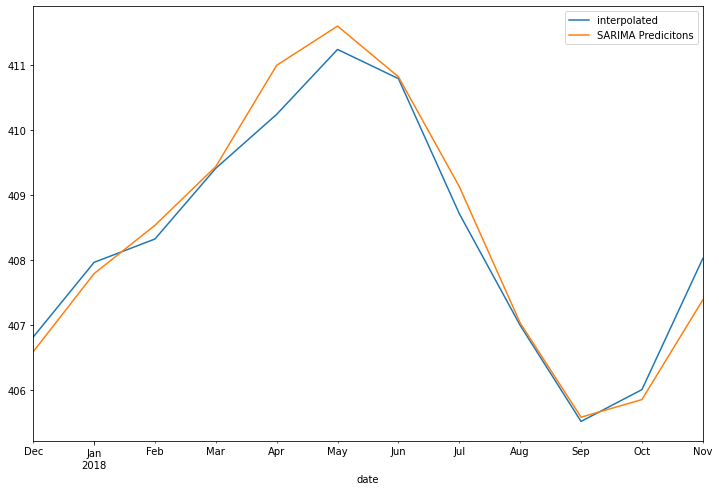

In [26]:
test['interpolated'].plot(figsize=(12, 8), legend=True)
predictions.plot(legend=True)

In [27]:
from statsmodels.tools.eval_measures import rmse

In [28]:
error = rmse(test['interpolated'], predictions)

In [29]:
error

0.3462318578556932

In [30]:
test['interpolated'].mean()

408.3333333333333

In [31]:
predictions.mean()

408.39233985672496

## Forecast into the unknown future

In [33]:
model = SARIMAX(df['interpolated'], order=(0, 1, 1), seasonal_order=(1, 0, 1, 12))
results = model.fit()

In [35]:
fcast = results.predict(start=len(df), end=len(df)+11, typ='levels').rename('SARIMA Forecast')

<AxesSubplot:xlabel='date'>

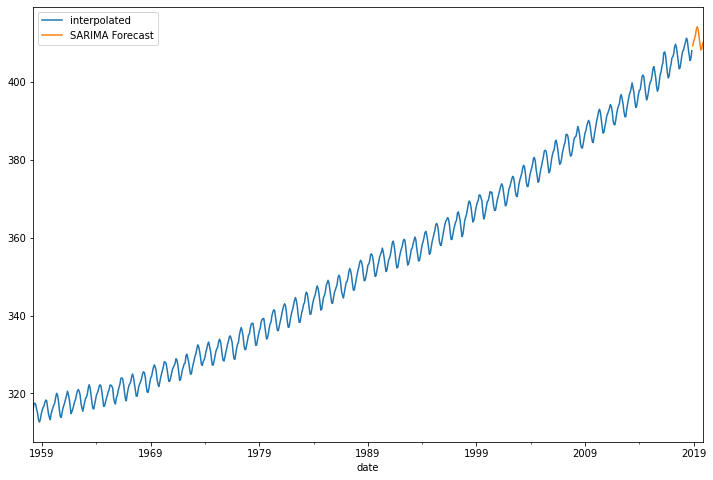

In [37]:
df['interpolated'].plot(figsize=(12, 8), legend=True)
fcast.plot(legend=True)